# Tarea 1 - Manuel Figueroa y Claudio Galaz

### 1 Regresión Lineal Ordinaria (LSS)

Los datos son los siguientes:
>**Prostate data info**

>Predictors (columns 1--8)

>outcome (column 9)

>train/test indicator (column 10)

>This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set.

>The goal is to predict the log of PSA (prostate specific antigen) (**lpsa**) from a number of measurements including log cancer volume (**lcavol**), log prostate weight **lweight**, **age**, log of benign prostatic hyperplasia amount **lbph**, seminal vesicle invasion **svi**, log of capsular penetration **lcp**, Gleason score gleason, and percent of Gleason scores 4 or 5 **pgg45**. 

#### a)
Primero se importan las librerías y los datos.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep ='\t', header = 0)

Luego se elimina la primera columna de los datos, que contiene el número de fila.

In [32]:
df = df.drop('Unnamed: 0', axis=1)

Y después se crean arreglos con los datos de training/test set, y se elimina esa columna de los datos

In [33]:
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)

df = df.drop('train', axis=1)

Finalmente quedan dos arreglos booleanos: **istrain** que es *True* para los datos que forman parte del training set e **istest** que es la operación lógica *NOT* sobre el primer set, marcando con *True* los elementos del test set.

#### b)
Las lineas de a continuación muestran información relevante sobre los datos extraídos. Estos son la cantidad de datos (count), el promedio (mean), desviación estándar (std), dato máximo (max), dato mínimo (min), y los percentiles 25, 50 y 75.

In [34]:
#from IPython.display import clear_output
df.shape
df.info()
df.describe()
#clear_output()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


De los datos se puede observar que la característica *svi* es binaria, *gleason* es entera con valores entre 6 y 9, y *pgg45* es una variable porcentual y entera.

#### c)

Antes de entrar a trabajar con los datos es importante **normalizarlos**. Esto es necesario puesto que, como cada dimension tiene su propia escala de datos, se hace difícil comparar entre dimensiones. 

Por ejemplo, *age* varía entre 41 y 79 y *lweight* se mueve entre 2.374906 y 4.780383, por lo que para poder trabajar con estos datos en conjunto es importante llevarlos a una misma escala.

Una vez normalizada, la columna de la característica *lpsa* debe quedar como estaba antes (sin normalizar) debido a que es el objetivo a predecir.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']
df_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,3.204767e-17,-3.170431e-16,4.131861e-16,-2.432190e-17,-3.662591e-17,3.662591e-17,-2.174664e-17,5.636957e-17,2.478387
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.154329
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,-0.430783
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,1.731656
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01,2.591516
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01,3.056357
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00,5.582932


Los promedios de todos los datos normalizados son muy pequeños comparado con los datos, por lo que se puede decir que el promedio es prácticamente cero.

#### d)

A continuación se realiza una regresión lineal de mínimos cuadrados.

In [36]:
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[istest]
ytest = y[istest]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

El tercer paso (cuarta línea) agrega una columna llena de números 1, llamada **intercept**, a la derecha de la última columna (*lpsa*). Esta columna representa el valor de $x_0 $ en la matriz de los predictores de tal forma que el intercepto sea $\beta_0$.

Como los datos están normalizados, estos tienen sus promedios centrados y no es necesario calcular el intercepto (es cero)

#### e)

Se calculan los z scores como $$z_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}}$$ 

Donde $v_j$ es el elemento j-esimo de la diagonal de la matriz $(X^T X)^{-1}$ y el la desviación $\sigma$ es estimada como: $$\hat{\sigma}^2 = \frac{1}{N-p-1} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2$$


In [37]:
betas = linreg.coef_

N = Xtrain.shape[0]
p = Xtrain.shape[1]
sigma = sum((linreg.predict(Xtrain) - ytrain) ** 2)/ (N - p -1)

mat_vj = np.dot(np.transpose(Xtrain),Xtrain)
vj = np.diag(np.linalg.inv(mat_vj))

z_score = betas/np.sqrt(sigma*vj)

print ('{0:12} {1:15} {2:12}'.format("Variable", "Coeficiente", "Z Score"))
print "-------------------------------------"
for i in range(z_score.shape[0]):
    print ('{0:10} {1:10.3f} {2:12.3f}'.format(Xtrain.columns.values[i],betas[i],z_score[i]))
    

Variable     Coeficiente     Z Score     
-------------------------------------
lcavol          0.676        5.320
lweight         0.262        2.727
age            -0.141       -1.384
lbph            0.209        2.038
svi             0.304        2.448
lcp            -0.287       -1.851
gleason        -0.021       -0.145
pgg45           0.266        1.723
intercept       2.465       27.359


El Z-score permite identificar aquellas variables que no deberían tener un $\beta = 0$. Un Z-score mayor a 1.96 (valor absoluto) tiene una significancia del 5%. En este caso se observa claramente que **lcavol** es la variable más relacionada con el resultado ya que tanto su coeficiente como el Z-score son los mayores. 

Las variables **lweight**, **lbph** y **svi** quedan también sobre el 5% de significancia, se puede decir que el resto de las variables (**age, lcp, gleason y pgg45**) no hay evidencia de que estén relacionadas con el resultado.

#### f)

En el siguiente código se calcula el error cuadrático medio en el modelo utilizado hasta ahora, y luego se crea el modelo utilizando cross-validation con k-folds utilizando 5 y 10 folds.

In [38]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
from sklearn import cross_validation
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()


print "Error en test set antes de Cross-validation: %.3f "%(mse_test)

for i in range(2):
    k_fold = cross_validation.KFold(len(Xm),(5*i+5))
    mse_cv = 0
    for k, (train, val) in enumerate(k_fold):
        linreg = lm.LinearRegression(fit_intercept = False)
        linreg.fit(Xm[train], ym[train])
        yhat_val = linreg.predict(Xm[val])
        mse_fold = np.mean(np.power(yhat_val - ym[val],2))
        mse_cv += mse_fold
    mse_v = mse_cv/(5*i+5)
    print "Error promedio con %d"%(5*i+5), "folds: %3f " %(mse_v)


Error en test set antes de Cross-validation: 0.521 
Error promedio con 5 folds: 0.956515 
Error promedio con 10 folds: 0.757237 


El error del modelo al utilizar cross validation aumenta, esto quiere decir que los resultados del modelo anterior están sobre ajustados a los datos de entrenamiento.

#### g)

Finalmente se realiza un gráfico quantile-quantile para analizar si los errores de predicción del modelo siguen una distribución normal.

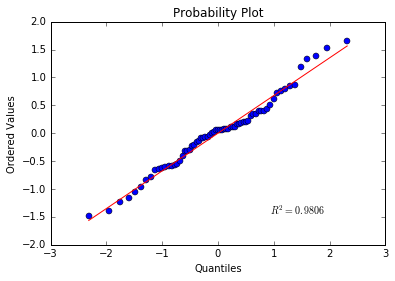

In [39]:
import scipy.stats as stats

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)
y_predicted = linreg.predict(Xtrain)

measurements = (y_predicted - ytrain)

stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

En el gráfico se observa a simple vista que los puntos se encuentran sobre la linea de la distribución normal, y el R$^2$ del modelo es de 0.9806 por lo que se puede aceptar la hiótesis de normalidad de los residuos de los datos de entrenamiento

### 2 Selección de atributos


Se crearon algoritmos de forward selection y backwards selection. El primero se modificó para tomar como criterio de selección de atributos el error cuadrático medio de los datos de test, además se agregaron los errores de test set y train set de cada modelo al retorno del algoritmo.

El algoritmo de backwards selection se basa en el primero pero en éste el modelo inicial contiene todas las variables y se van eliminando de a una, eligiendo siempre la que mantenga el menor mse con los datos de prueba.

Finalmente se grafican los datos obtenidos, representando tanto el mse del training set como el del test set en función de la cantidad de variables del modelo para ambos algoritmos de selección.

In [40]:
def fss(x, y, x2, y2, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    test_errors = []
    train_errors = []
    current_score = 0.0
    best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            x_test = x2[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            predictions_test= model.predict(x_test)
            residuals_test = predictions_test - y2
            mse_candidate = np.mean(np.power(residuals_train, 2))
            mse_test = np.mean(np.power(residuals_test, 2))
            score_candidates.append((mse_test, mse_candidate, candidate)) #criterio de seleccion es error en test set
        score_candidates.sort()
        #print score_candidates
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_train_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        test_errors.append(best_new_score)
        train_errors.append(best_train_score)
        #print "selected = %s ..."%names_x[best_candidate]
        #print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected, train_errors, test_errors

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]


Xm2 = Xtest.as_matrix()
ym2 = ytest.as_matrix()
fss_selected, fss_train_error, fss_test_error = fss(Xm,ym,Xm2,ym2,names_regressors)

def bss(x, y, x2, y2, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    modelo_anterior = range(0,p+1)
    selected = [p]
    test_errors = []
    train_errors = []
    
    #modelo completo
    model = lm.LinearRegression(fit_intercept=False)
    predictions_train = model.fit(x, y).predict(x)
    residuals_train = predictions_train - y
    predictions_test= model.predict(x2)
    residuals_test = predictions_test - y2
    mse_candidate = np.mean(np.power(residuals_train, 2))
    mse_test = np.mean(np.power(residuals_test, 2))
    test_errors.append(mse_test)
    train_errors.append(mse_candidate)
    
    current_score = 0.0
    best_new_score = 0.0
    while len(remaining)>1 and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:            
            model = lm.LinearRegression(fit_intercept=False)
            indexes = modelo_anterior[:]
            indexes.remove(candidate)
            x_train = x[:,indexes]
            x_test = x2[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            predictions_test= model.predict(x_test)
            residuals_test = predictions_test - y2
            mse_candidate = np.mean(np.power(residuals_train, 2))
            mse_test = np.mean(np.power(residuals_test, 2))
            score_candidates.append((mse_test, mse_candidate, candidate)) #criterio de seleccion es error en test set
        score_candidates.sort()
        #print score_candidates
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_train_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        modelo_anterior.remove(best_candidate)
        selected.append(best_candidate)
        test_errors.append(best_new_score)
        train_errors.append(best_train_score)
        #print "selected = %s ..."%names_x[best_candidate]
        #print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    #agrego el que quedo en la lista que sería el último en sacar
    selected.append(remaining[0])
    return selected, train_errors, test_errors

bss_selected, bss_train_error, bss_test_error = bss(Xm,ym,Xm2,ym2,names_regressors)

#saco el 8 de la lista porque es el intercepto
bss_selected.remove(8)
fss_selected.remove(8)


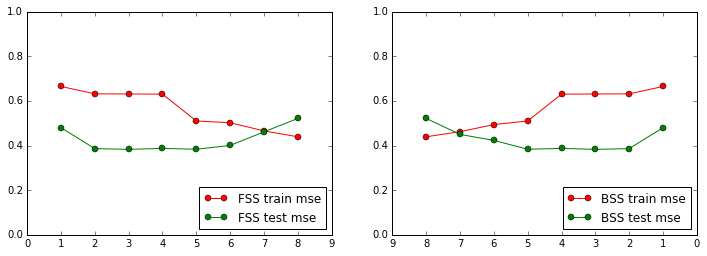

fss order of selection: [0, 4, 6, 2, 1, 7, 3, 5]
bss order of deletion: [7, 3, 5, 1, 2, 6, 4, 0]


In [41]:
eje_x = range(1,9)
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(eje_x, fss_train_error, 'ro-', label='FSS train mse')
plt.plot(eje_x, fss_test_error, 'go-', label = 'FSS test mse')
plt.legend(loc=4)
plt.xlim(0,9)
plt.ylim(0,1)

eje_x = range(8,0,-1)
plt.subplot(1,2,2)
plt.plot(eje_x, bss_train_error, 'ro-', label='BSS train mse')
plt.plot(eje_x, bss_test_error, 'go-', label = 'BSS test mse')
plt.legend(loc=4)
plt.xlim(0,9)
plt.ylim(0,1)
plt.gca().invert_xaxis()
plt.show()


print 'fss order of selection:', fss_selected
print 'bss order of deletion:', bss_selected



Lo primero que se observa es que ambos gráficos tienen una forma similar, es necesario notar que en el caso de BSS el orden del eje x está invertido. El error que el algoritmo considera para elegir al mejor candidato a agregar/quitar de la solución es el del test set, en la linea verde se en ambos casos se puede apreciar que el error no varía mucho con respecto al minimo de todos los modelos cuándo se utilizan entre 2 y 5 variables.

Naturalmente, en ambos casos el error en el training set es menor al considerar más variables, ya que se ajusta cada vez más a la totalidad de los datos, en particular al cosnsiderar 7 u 8 variables se puede considerar que el modelo se empieza a sobre-ajustar.

Finalmente se imprimen los arreglos de selección de fss y bss, ambos algoritmos consideran las mismas variables cuando el modelo tiene entre 1 y 5 variables, pero al momento de agregar la 6ta variable en el fss se considera primero la variable 7 (**pgg45**) mientras que el algoritmo bss elimina la misma en su primera iteración. 

A partir del orden de las primeras variables queda claro que el predictor más importante por si solo es **Lcavol**, lo que es consistente con los resultados del Z-score.

#### 3. Regularización

#### a)

In [ ]:
X = X.drop('intercept', axis = 1) #Elimina la columna de intercepto

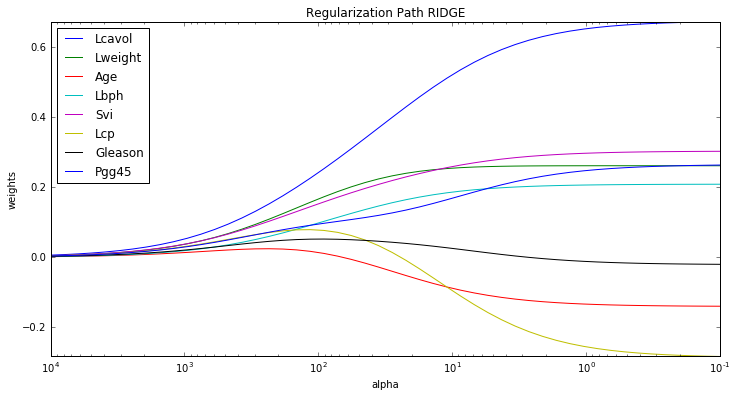

In [74]:
from sklearn.linear_model import Ridge
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept = True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)    

fig3 = plt.figure(figsize=(12,6))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

In [ ]:
    /'''
    coef_temp = model.coef_
    predictions_test= model.predict(Xtrain)
    residuals_test = predictions_test - ytrain
    mse_candidate = np.mean(np.power(residuals_test, 2))
    coef_temp = np.hstack((coef_temp,mse_candidate))
    
    coefs.append(coef_temp)
    '''/

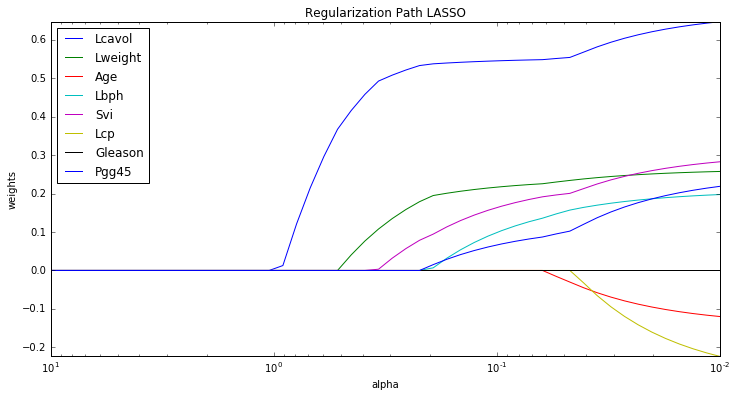

In [72]:
from sklearn.linear_model import Lasso
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-2,base=10)
coefs = []
clf = Lasso(fit_intercept = True)
for a in alphas_:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    coefs.append(clf.coef_)    
    
fig3 = plt.figure(figsize=(12,6))
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    #print alphas_.shape
    #print y_arr.shape
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

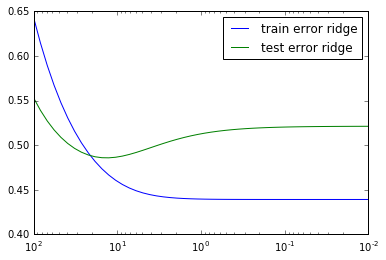

In [80]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

ax = plt.gca()
ax.plot(alphas_,mse_train,label= 'train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')

plt.legend(loc=1)
ax.set_xscale('log')

ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

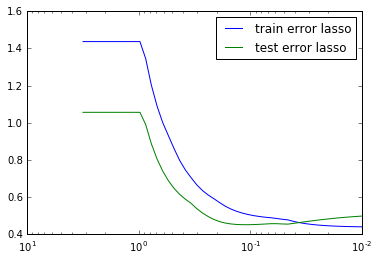

In [82]:
alphas_ = np.logspace(0.5,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))

ax = plt.gca()
ax.plot(alphas_,mse_train,label= 'train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')

plt.legend(loc=1)
ax.set_xscale('log')

ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [85]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val])for train, val in k_fold]

    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a
        
print "Best Alpha Lasso=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=0.010000, MSE(CV)=0.758661


In [89]:
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
alphas_ = np.logspace(4,-1,base=10)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val])for train, val in k_fold]

    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a

print "Best Alpha Ridge=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

Best Alpha Ridge=2.120951, MSE(CV)=0.751909
